In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt

from helpers import *


In [2]:
PATH_BT = '/home/orca/data/best_track/IBTrACS/'
track_file = 'ibtracs.NA.list.v04r00.csv'

df = pd.read_csv(PATH_BT + track_file)

<ipython-input-2-54e61a7417a5>:4: DtypeWarning: Columns (1,2,3,8,9,14,19,20,23,24,161,162) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(PATH_BT + track_file)


In [3]:
df.index = pd.to_datetime(df['ISO_TIME'], errors='coerce')
df.head()

<ipython-input-3-656c4f92d310>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df['ISO_TIME'], errors='coerce')


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
ISO_TIME,,,,,,,,,,,,,,,,,,,,,
NaT,,Year,,,,,,,degrees_north,degrees_east,...,second,kts,second,ft,nmile,nmile,nmile,nmile,kts,degrees
1851-06-23 12:00:00,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 12:00:00,TS,26.1000,-90.4000,...,,,,,,,,,6,291
1851-06-23 15:00:00,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 15:00:00,TS,26.2001,-90.6999,...,,,,,,,,,6,290
1851-06-23 18:00:00,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 18:00:00,TS,26.3000,-91.0000,...,,,,,,,,,6,290
1851-06-23 21:00:00,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 21:00:00,TS,26.3999,-91.3001,...,,,,,,,,,6,290


## Isolate data from 1980 onwards and all the Named Storms

In [4]:
df_1980_onwards = df[df.index.year >= 1980] #identify the storms that occurred after 1980
# df_1980_onwards.head()

named_storms = df_1980_onwards[df_1980_onwards['NAME'] != 'NOT_NAMED'] #identify the named storms
named_storms.head()


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
ISO_TIME,,,,,,,,,,,,,,,,,,,,,
1980-07-31 12:00:00,1980214N11330,1980,57,NaN,NaN,ALLEN,1980-07-31 12:00:00,NR,11.0,-30.0,...,,,,,,,,,22,267
1980-07-31 15:00:00,1980214N11330,1980,57,NaN,NaN,ALLEN,1980-07-31 15:00:00,NR,10.9509,-31.1101,...,,,,,,,,,22,267
1980-07-31 18:00:00,1980214N11330,1980,57,NaN,NaN,ALLEN,1980-07-31 18:00:00,NR,10.9,-32.2,...,,,,,,,,,21,267
1980-07-31 21:00:00,1980214N11330,1980,57,NaN,NaN,ALLEN,1980-07-31 21:00:00,NR,10.8496,-33.2574,...,,,,,,,,,21,267
1980-08-01 00:00:00,1980214N11330,1980,57,NaN,NaN,ALLEN,1980-08-01 00:00:00,TS,10.8,-34.3,...,,,,,,,,,21,267


In [5]:
unique_names_count = named_storms['NAME'].nunique()
print(f"Number of unique names: {unique_names_count}")


Number of unique names: 185


In [6]:
crs = ccrs.PlateCarree()
coast = cfeature.GSHHSFeature(scale='high', levels=[1,], edgecolor='k')
lakes = cfeature.GSHHSFeature(scale='high', levels=[2,], edgecolor='face',facecolor='grey')
borders = cfeature.BORDERS

#Track Domain
min_lat_track = 0
max_lat_track = 50
min_lon_track = -100
max_lon_track = -10


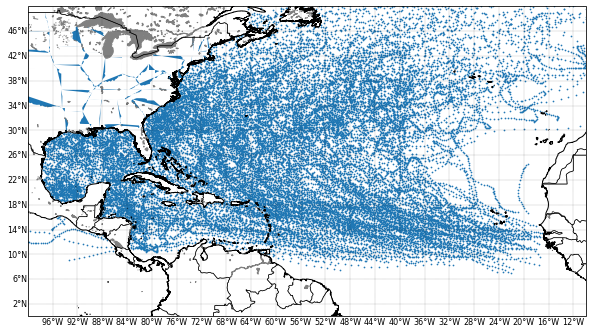

In [7]:
plot_area_track = [max_lon_track + 360.0, min_lon_track + 360.0, min_lat_track,max_lat_track]

gridsize = (1, 1)
fig = plt.figure(figsize=(10,10))

#Track
ax1 = plt.subplot2grid(gridsize, (0,0), colspan=1, rowspan=1, projection=crs)

ax1.scatter(named_storms.LON.values, named_storms.LAT.values, marker='o', s=0.5, zorder=-100)
Cartopy_Features(ax1, 8, plot_area_track, 4, 4, 'k')

plt.show()


ISO_TIME
January        137
April          130
May            448
June          1535
July          2836
August        8267
September    14680
October       5973
November      2259
December       413
dtype: int64


<AxesSubplot:xlabel='ISO_TIME'>

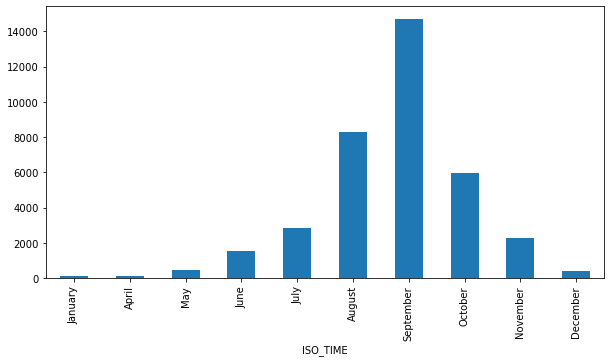

In [9]:
# Group storms by month
storms_by_month = named_storms.groupby(named_storms.index.month).size()

# Rename the index to month names for better readability
storms_by_month.index = storms_by_month.index.map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})

print(storms_by_month)


storms_by_month.plot(kind='bar', figsize=(10,5))


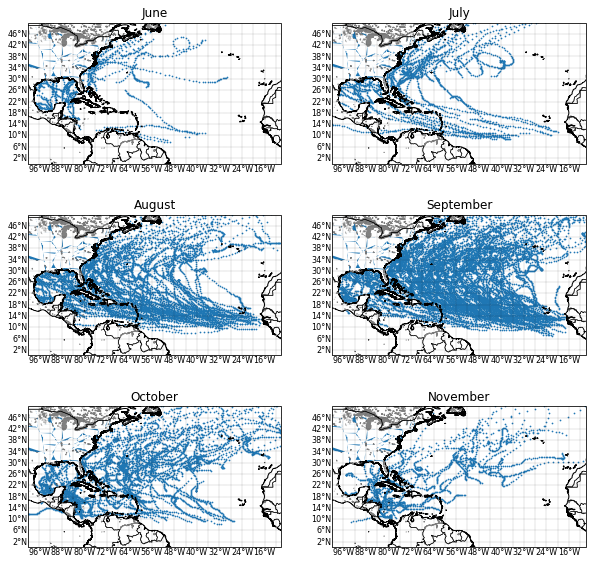

In [11]:
storms_june = named_storms[named_storms.index.month == 6]
storms_july = named_storms[named_storms.index.month == 7]
storms_august = named_storms[named_storms.index.month == 8]
storms_september = named_storms[named_storms.index.month == 9]
storms_october = named_storms[named_storms.index.month == 10]
storms_november = named_storms[named_storms.index.month == 11]

#Cartopy dependencies
crs = ccrs.PlateCarree()
coast = cfeature.GSHHSFeature(scale='high', levels=[1,], edgecolor='k')
lakes = cfeature.GSHHSFeature(scale='high', levels=[2,], edgecolor='face',facecolor='grey')
borders = cfeature.BORDERS

#Track Domain
min_lat_track = 0
max_lat_track = 50
min_lon_track = -100
max_lon_track = -10
plot_area_track = [max_lon_track + 360.0, min_lon_track + 360.0, min_lat_track,max_lat_track]

fontsize=12

gridsize = (3, 2)
fig = plt.figure(figsize=(10,10))

#June Tracks
ax1 = plt.subplot2grid(gridsize, (0,0), colspan=1, rowspan=1, projection=crs)

ax1.scatter(storms_june.LON.values, storms_june.LAT.values, marker='o', s=0.5, zorder=-100)
Cartopy_Features(ax1, 8, plot_area_track, 4, 4, 'k')

ax1.set_title('June', fontsize=fontsize)

#July Tracks
ax2 = plt.subplot2grid(gridsize, (0,1), colspan=1, rowspan=1, projection=crs)

ax2.scatter(storms_july.LON.values, storms_july.LAT.values, marker='o', s=0.5, zorder=-100)
Cartopy_Features(ax2, 8, plot_area_track, 4, 4, 'k')

ax2.set_title('July', fontsize=fontsize)

#August Tracks
ax3 = plt.subplot2grid(gridsize, (1,0), colspan=1, rowspan=1, projection=crs)

ax3.scatter(storms_august.LON.values, storms_august.LAT.values, marker='o', s=0.5, zorder=-100)
Cartopy_Features(ax3, 8, plot_area_track, 4, 4, 'k')

ax3.set_title('August', fontsize=fontsize)

#September Tracks
ax4 = plt.subplot2grid(gridsize, (1,1), colspan=1, rowspan=1, projection=crs)

ax4.scatter(storms_september.LON.values, storms_september.LAT.values, marker='o', s=0.5, zorder=-100)
Cartopy_Features(ax4, 8, plot_area_track, 4, 4, 'k')

ax4.set_title('September', fontsize=fontsize)

#October Tracks
ax5 = plt.subplot2grid(gridsize, (2,0), colspan=1, rowspan=1, projection=crs)
ax5.scatter(storms_october.LON.values, storms_october.LAT.values, marker='o', s=0.5, zorder=-100)

Cartopy_Features(ax5, 8, plot_area_track, 4, 4, 'k')
ax5.set_title('October', fontsize=fontsize)

#November Tracks
ax6 = plt.subplot2grid(gridsize, (2,1), colspan=1, rowspan=1, projection=crs)
ax6.scatter(storms_november.LON.values, storms_november.LAT.values, marker='o', s=0.5, zorder=-100)

Cartopy_Features(ax6, 8, plot_area_track, 4, 4, 'k')
ax6.set_title('November', fontsize=fontsize)

plt.show()